<a href="https://colab.research.google.com/github/correamv/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_da_Cidade_de_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="30%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/512px-Airbnb_Logo_B%C3%A9lo.svg.png"></center>



### Buenos Aires

Neste artigo iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.

Buenos Aires é a capital e a maior cidade da Argentina. Localizada na região sul do país, na costa do Rio da Prata, é conhecida por sua arquitetura européia, cultura vibrante e paixão pelo futebol. É também o centro financeiro e comercial da Argentina e um importante destino turístico, oferecendo muitas atrações, como teatros, galerias de arte, restaurantes e parques. Além disso, é famosa por sua intensa vida noturna e sua forte identidade cultural, refletida em sua música, dança e culinária.

<center><img alt="Analisando Airbnb" width="100%" src="https://3em3.com/wp-content/uploads/2019/07/3em3_buenos_aires.jpg.webp"></center>





## Obtenção dos Dados


Conforme mencionado anteriormente, iremos extrair os dados do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Para este projeto, utilizaremos uma versão resumida dos dados que é composta do arquivo `listings.csv`. Há também uma opção de dataset com mais variáveis para análise, que tem por nome 	`listings.csv.gz`.

Abaixo importaremos as bibliotecas que serão utilizadas, como o Pandas, Matplotlib e Seaborn. E também importaremos o banco de dados mais atualizado sobre a cidade.
Deixo no final deste artigo as referências para a documentação de cada uma das bibliotecas, caso o leitor deseje conhecer mais sobre as ferramentas.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2022-12-29/visualisations/listings.csv")


## Análise dos Dados

Nesta etapa faremos uma análise *exploratória* dos dados onde buscaremos identificar quais são as variáveis e como se classificam, a quantidade de valores ausentes e se temos a presença ou não de *outliers* em nossos dados.

Abaixo segue o dicionário das variáveis encontradas no Dataset:


**Dicionário das variáveis**

* `id` - Número de ID gerado para identificar o imóvel.
* `name` - Nome do imóvel anunciado.
* `host_id` - Número de ID gerado para identificar o host do imóvel.
* `neighbourhood_group` - Esta variável não contem valores válidos. 
* `neighbourhood` -  Bairro em que está localizado a propriedade.
* `latitude` - Latitude que está localizada a propriedade.
* `longitude` - Longitude que está localizada a propriedade.
* `room_type` - Tipo de imóvel que está sendo anunciado.
* `price` - Valor de locação de uma noite do imóvel.
* `minimum_nights` - Quantidade mínima de noites para alugar.
* `number_of_reviews` - Quantidade de reviews da propriedade
* `last_review` - Data da última avaliação da propriedade
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis que o host tem na região.
* `availability_365` - Número de dias ainda disponíveis para alugar o imóvel.
* `number_of_reviews_ltm` - Número de reviews que o imóvel teve nos últimos 12 meses.
* `license` - Número da licença do imóvel.



Utilizaremos o código abaixo para verificarmos as cinco primeiras entradas nos dados, e termos uma noção visual preliminar de como estão dispostos os dados. 

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,21143,3,33,2022-12-19,0.26,1,309,6,NaN
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,5728,7,102,2022-12-05,0.80,4,305,11,NaN
2,317484,Single Room in Palermo Soho,1621752,Luba,NaN,Palermo,-34.58992,-58.42236,Private room,3348,2,160,2022-12-10,1.22,4,349,5,NaN
3,15074,ROOM WITH RIVER SIGHT,59338,Monica,NaN,Nuñez,-34.53892,-58.46599,Private room,5286,29,0,NaN,NaN,1,365,0,NaN
4,118070,Amazing view - GREAT Studio - Balcony,530261,Luciano,NaN,Palermo,-34.58311,-58.42767,Entire home/apt,10572,14,49,2022-07-22,0.36,27,349,4,NaN


Observe que na variável `name` temos a título do anúncio no Airbnb do imóvel. Além disso temos outras informações como o bairro em `neighbourhood`, o tipo de imóvel, ou seja, se está para locação um apartamento ou casa inteiros, ou apenas um quarto privativo, na variável `room_type` e entre outros. 

### **Qual o tamanho do Dataset e qual o tipo das variáveis?**

Vamos prosseguir e verificar quantas entradas temos em nosso dataset e o tipo de cada um dos dados. 

Observe que entre as variáveis temos tipos inteiros, floats e objetos.


In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar o tipo das variáveis no dataset
display(df.dtypes)

Entradas:	 20085
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Tratando Valores Ausentes**

É de fundamental importância verificarmos a quantidade de valores ausentes antes de trabalhar com um conjunto de dados. E não somente a quantidade, mas o contexto na qual esses valores se apresentam, e se possível a razão da ausência dos  valores, visto que isto pode afetar significativamente a qualidade dos resultados da análise final. 



In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
license                           0.979437
reviews_per_month                 0.190739
last_review                       0.190739
name                              0.000149
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

* É possível ver que a coluna `neighbourhood_group` possui 100% de valores ausentes, e a coluna `license` possui 97%. Com isso não faremos análises utilizando estas variáveis e portanto iremos remove-las.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 22% das entradas o que é um valor alto. Podemos assumir que se estes valores estão nulos, quer dizer que não houve avaliações para determinados imóveis, o que é perfeitamente plausível.

* Para a coluna `reviews_per_month` iremos substituir os valores nulos por 'zeros'.

* À variável `last_review`será eliminada, pois não será utilizada nesta análise. 

* Em `name`e `host_name` temos menos de 0,1% de valores nulos. Com isso podemos considerar este valor irrelevante e remover estas linhas de nossa análise. 



In [6]:
#removendo colunas neighbourhood_group, license e last_review
df.drop(['neighbourhood_group', 'license', 'last_review'], axis=1, inplace=True)

In [7]:
#substituindo valores nulos em 'reviews_per_month por zeros
df.fillna({'reviews_per_month': 0}, inplace = True)

#removendo valores nulos das variaveis name e host_name
df.dropna(subset=['name', 'host_name'], axis=0, inplace=True)

### **Distribuição das variáveis** 
Agora que já tratamos dos valores ausentes, é fundamental conhecermos a distribuição das variáveis presentes. Para isso usaremos um tipo de visualização muito comum no ramo estatístico que é o **histograma**.

Um histograma é um tipo de gráfico que representa a distribuição de frequência de dados contínuos ou discretos, agrupados em classes ou "bins". Ele mostra a quantidade de observações que caem dentro de cada categoria, sendo usado para visualizar a distribuição de uma variável numérica.

Com base no histograma abaixo, já é possível identificarmos alguns pontos importantes. 

As variáveis `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month` e `calculated_host_listings_count` possuem indícios da presença de outliers.

Outliers são valores extremos ou anômalos em um conjunto de dados, que se diferem significativamente dos demais valores. Eles podem ser causados por erros de medição, erros de digitação, valores inesperados ou até mesmo por uma distribuição diferente dos dados.





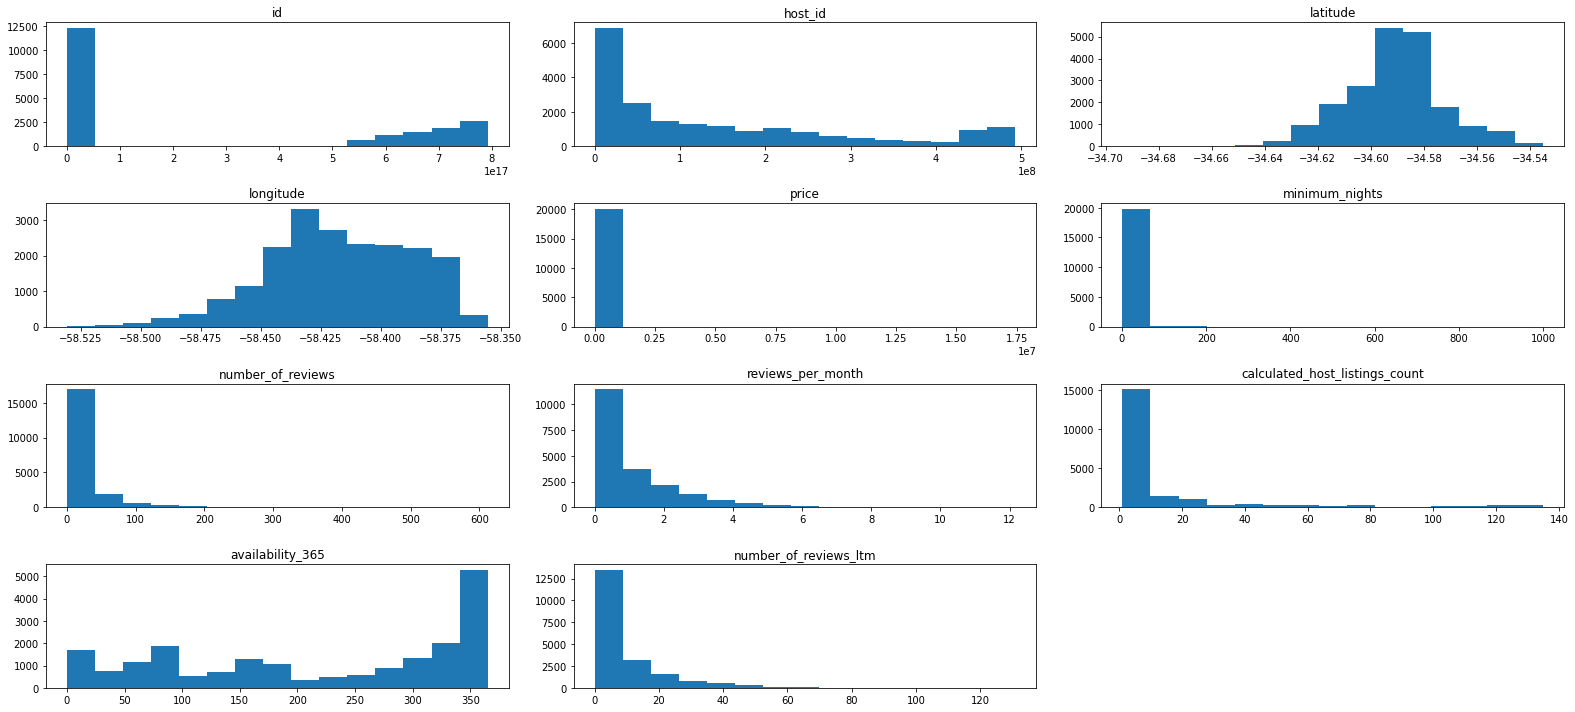

In [27]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(22,10), grid=False);

plt.tight_layout()

### **Tratamento dos Outliers**

Após identificarmos a possível presença destes outliers nos dados usando os histogramas, o próximo passo é definirmos quantitativamente estes valores.

Para isso usaremos duas estratégias:

* Usar o método `describe()` do Pandas para termos uma visão estatística de cada variável;
*Plotar gráficos tipo boxplox, para realizarmos uma análise visual mais detalhada das variáveis em questão;

Para os fins deste projeto, iremos restringir esta análise as variáveis `price` e `minimum_nights`, já que as demais não utilizaremos em nossos cálculos. 

Veja que utilizando o método `describe()` podemos confirmar que:

* Em `price` 75% dos valores estão até 12.334,00 pesos argentinos e o valor máximo encontrado foi de 17.443.111,00 pesos. 

* Em `minimum_nights` encontramos 75% dos valores com até 5 dias de estadia. Porém temos um valor máximo acima de 365 dias (um ano).

Agora, irei plotar os gráficos de boxplot para estas duas variáveis, afim de termos uma noção visual da distribuição dos valores. 





In [9]:
df.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.008200e+04,20082.0,20082.0,20082.0,20082.0,20082.0,20082.0,20082.0,20082.0,20082.0,20082.0
mean,2.687784e+17,141112874.3,-34.6,-58.4,16443.9,7.2,21.9,1.1,13.1,217.3,8.7
std,3.404578e+17,150613195.0,0.0,0.0,191552.2,28.3,38.4,1.3,26.5,127.4,12.5
min,1.150800e+04,13426.0,-34.7,-58.5,260.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,2.828487e+07,15344636.5,-34.6,-58.4,5638.0,2.0,1.0,0.1,1.0,89.0,0.0
50%,4.594042e+07,80985348.0,-34.6,-58.4,7953.0,3.0,8.0,0.6,2.0,246.0,3.0
75%,6.710062e+17,226725855.5,-34.6,-58.4,12334.0,5.0,25.0,1.6,9.8,343.0,12.0
max,7.920157e+17,493048915.0,-34.5,-58.4,17443111.0,1000.0,612.0,12.2,135.0,365.0,131.0




####Boxplot para minimum_nights

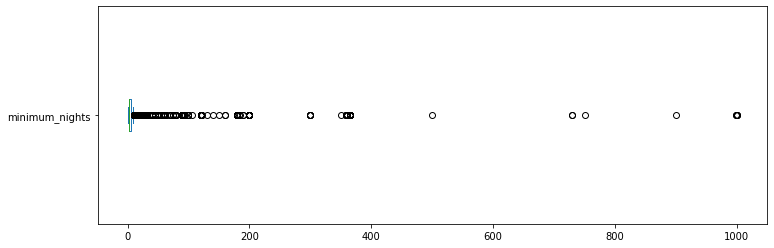

minimum_nights: valores acima de 30:
371 entradas
1.8474%


In [10]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(12,4))
plt.show()
#ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para Price

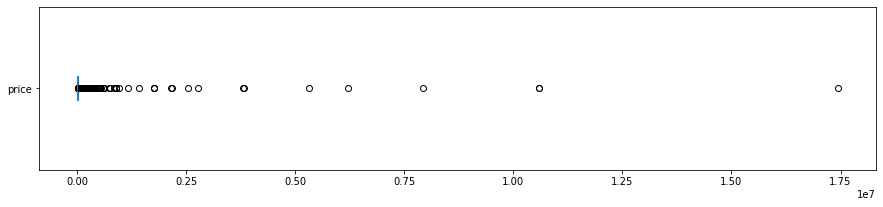


price: valores acima de 30000
892 entradas
4.4418%


In [11]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
print("\nprice: valores acima de 30000")
print("{} entradas".format(len(df[df.price > 30000])))
print("{:.4f}%".format((len(df[df.price > 30000]) / df.shape[0]) * 100))

Utilizaremos o método do `IQR Score` para delimitarmos e limparmos os outliers nestas variáveis mencionadas. 


Este método consiste em calcular o intervalo interquartil das variáveis, da seguinte forma:

<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>

# IQR = Q3 - Q1

Onde:

* Q3: Terceiro quartil (75%)
* Q1: Primeiro quartil (25%)

Com isso, usaremos as fórmulas abaixo para definir o limite mínimo e máximo do range que iremos definir como nosso dataset válido. Ou seja, todos os valores abaixo do limite mínimo ou acima do limite máximo, serão tratados como outliers. 

* Limite inferior =  (Q1 - 1.5 * IQR)
* Limite superior =  (Q3 + 1.5 * IQR)

Utilizaremos a propriedade `quantile` do pandas, para calcular os quartis.

In [12]:
#identificando os outliers para a variável price

#----calculando IQR

#primeiro quartil
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
iqr_price = q3_price - q1_price
print('O IQR da variável price é:', iqr_price)

#----definindo os limites
inf_price = q1_price - 1.5 * iqr_price
sup_price = q3_price + 1.5 * iqr_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)


O IQR da variável price é: 6696.0
Limite superior de price:  22378.0
Limite inferior de price:  -4406.0


In [13]:
#identificando os outliers para a variável minimum_nights

#----calculando IQR

#primeiro quartil
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('O IQR da variável minimum_nights é:', iqr_minimum_nights)

#----definindo os limites
inf_minimum_nights = q1_minimum_nights - 1.5 * iqr_minimum_nights
sup_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

O IQR da variável minimum_nights é: 3.0
Limite superior de minimum_nights:  9.5
Limite inferior de minimum_nights:  -2.5


#### Limpando o dataset
Vemos que não temos outliers no limite inferior para ambas as variáveis. Iremos agora limpar o dataset e plotar novamente o boxplot. Com isso poderemos prosseguir com nossa análise.

In [14]:
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > sup_price].index, axis =0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace = True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ', df_clean.shape)

Shape antes da limpeza:  (20082, 15)
Shape após a limpeza:  (16404, 15)


#### Boxplot após limpeza

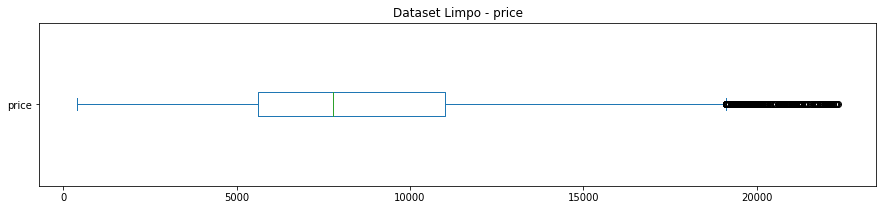

In [15]:
# plotando boxplot após limpeza

fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()


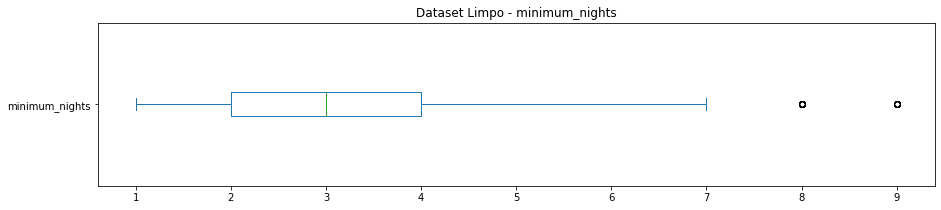

In [16]:
# plotando boxplot após limpeza

fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - minimum_nights')
plt.show()

Aqui podemos ver o resultado da limpeza.

O boxplot mostra alguns dados como outliers, entretanto, esses estão sendo calculados em relação ao novo dataset, e nossa limpeza levou em consideração os quartis do dado original.

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente.

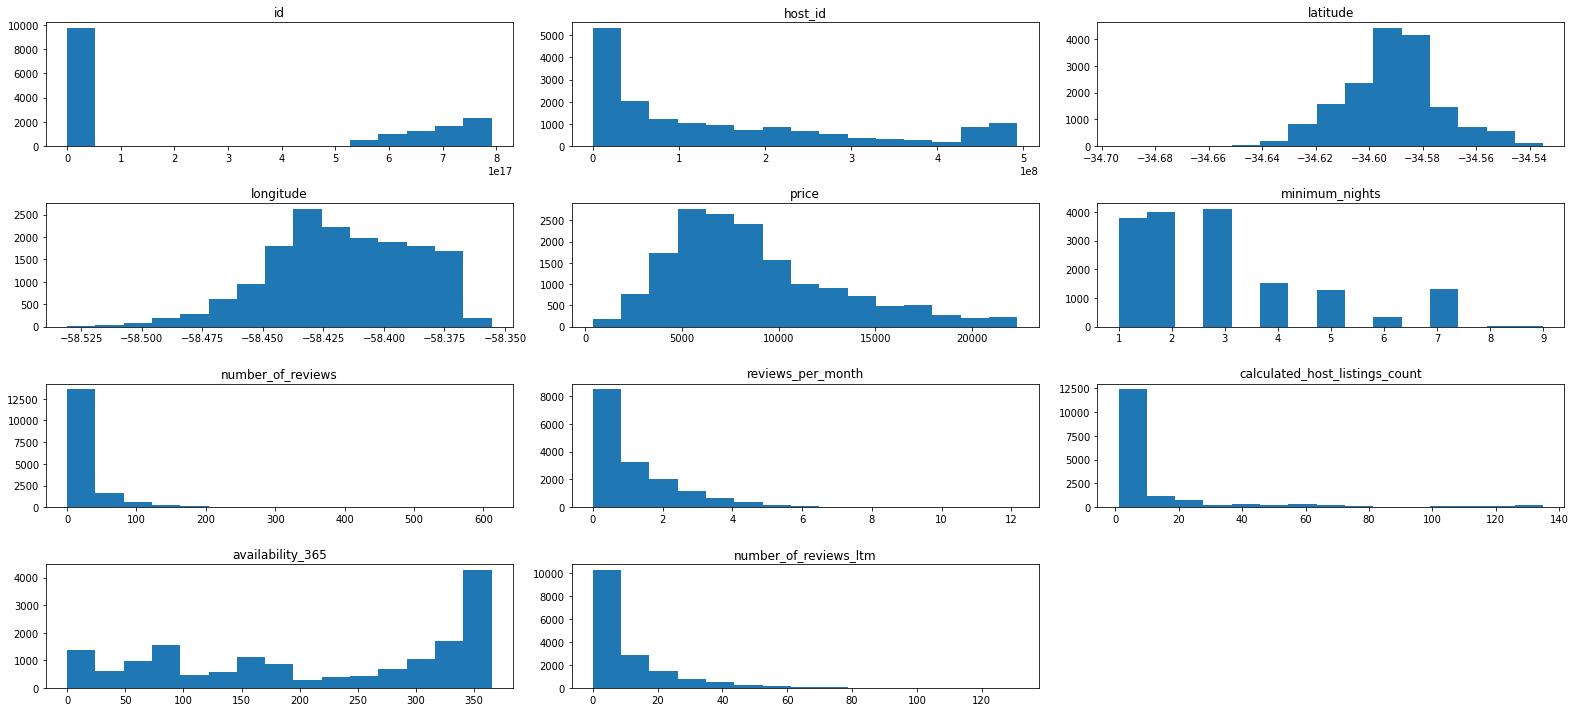

In [17]:
df_clean.hist(bins=15, figsize=(22,10), grid=False);

plt.tight_layout()

Agora olharemos a distribuição estatística das variáveis:

In [18]:
 df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.640400e+04,16404.0,16404.0,16404.0,16404.0,16404.0,16404.0,16404.0,16404.0,16404.0,16404.0
mean,2.830496e+17,147699154.7,-34.6,-58.4,8731.7,2.9,23.8,1.2,12.8,216.1,9.8
std,3.441022e+17,153387372.0,0.0,0.0,4358.3,1.8,40.1,1.4,26.1,127.5,13.1
min,1.150800e+04,13426.0,-34.7,-58.5,400.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,2.941509e+07,17398938.8,-34.6,-58.4,5621.0,2.0,2.0,0.1,1.0,89.0,0.0
50%,4.781089e+07,88597619.0,-34.6,-58.4,7777.0,3.0,9.0,0.8,2.0,243.0,5.0
75%,6.805230e+17,234799487.0,-34.6,-58.4,11024.0,4.0,28.0,1.8,9.0,343.0,14.0
max,7.914597e+17,493048915.0,-34.5,-58.4,22347.0,9.0,612.0,12.2,135.0,365.0,131.0


Podemos observar alguns pontos importantes:

* a média da variável `price` foi drasticamente reduzida, confirmando a sensibilidade deste atributo a outliers.
* a mediana foi pouco afetada na limpeza, reforçando a robustez deste atributo.

### **Qual a média dos preços de aluguel?**



In [19]:
media_precos = df_clean.price.mean().round(2)
print("a média dos preços de aluguel é de:", media_precos, "pesos")

a média dos preços de aluguel é de: 8731.66 pesos


### **Qual a correlação existente entre as variáveis**

In [20]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)
# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.002866,-0.033691,-0.032654,0.164425,0.091415
minimum_nights,-0.002866,1.000000,-0.079495,-0.249782,-0.062626,-0.093667
number_of_reviews,-0.033691,-0.079495,1.000000,0.320348,-0.048841,-0.053869
reviews_per_month,-0.032654,-0.249782,0.320348,1.000000,0.058394,0.052895
calculated_host_listings_count,0.164425,-0.062626,-0.048841,0.058394,1.000000,0.001268
availability_365,0.091415,-0.093667,-0.053869,0.052895,0.001268,1.000000


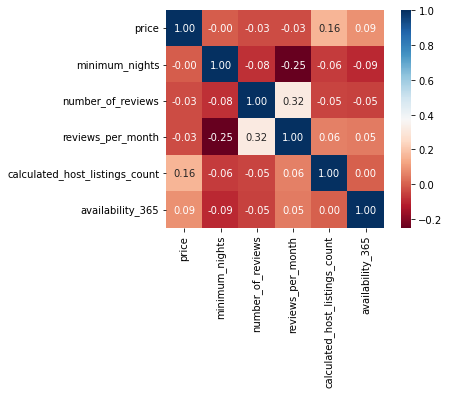

In [21]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="RdBu", fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [22]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14545
Private room        1647
Shared room          128
Hotel room            84
Name: room_type, dtype: int64

In [23]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print((df_clean.room_type.value_counts() / df_clean.shape[0]) * 100)

Entire home/apt    88.667398
Private room       10.040234
Shared room         0.780297
Hotel room          0.512070
Name: room_type, dtype: float64


Vemos acima que 88% dos alugueis em Buenos Aires, são de casas ou apartamentos inteiros.

### **Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [24]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Puerto Madero      15137.029851
Palermo             9981.325390
Velez Sarsfield     9801.875000
Belgrano            9107.965131
Nuñez               9061.043605
Recoleta            9046.593935
Retiro              8808.706549
Villa Devoto        8371.266667
Colegiales          8182.529570
Barracas            8121.015625
Name: price, dtype: float64

Com isso podemos ver que o bairro Puerto Madero apresenta em média os valores mais altos de aluguéis. O que corresponde com o valor turístico agregado a este bairro, já que possui muitas atrações neste sentido.

Abaixo plotarei o gráfico de dispersão dos imóveis com base em sua latitude e longitude. Assim poderemos ter uma noção visual preliminar,  de como os imóveis estão distribuídos geograficamente pela cidade.

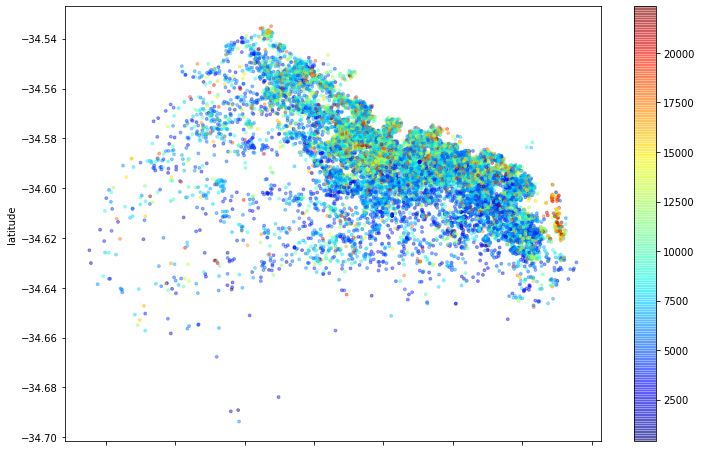

In [25]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Qual é a média do mínimo de noites para aluguel ?**

In [26]:
# ver a média da coluna `minimum_nights``
print('Média do mínimo de noites para alugar: {:.2f}'.format(df_clean['minimum_nights'].mean()))

Média do mínimo de noites para alugar: 2.94


## Conclusões

Neste breve documento realizei uma análise superficial sobre os dados resumidos do Airbnb para a cidade de Buenos Aires. 
Percebe-se que a existência de outliers nos dados, se não tratados, podem levar a conclusões equivocadas na análise, como foi o caso para identificar os imóveis mais caros.

Sendo assim, uma pessoa que busque uma temporada na cidade, pode esperar desenbolsar na média 8700 pesos, ou caso busque o bairro mais requisitado da cidade, pode-se esperar um gasto com diárias de aluguel em torno de 15 mil pesos. Além disso, em sua grande maioria os imóveis para locação costumam ser quartos ou apartamentos inteiros com o mínimo de 3 noites para alugar por vez.





